# Credits #

This notebook wac created during Artificial Intelligence in Architecture module of IAAC MACAD. It is a part of group 4 studio project: </br>
"URBAN VOID \\ A DATA DRIVEN APPROACH TO URBAN ACTIVATION"

This notebook is partially based on this repository:
https://github.com/gcc-dav-official-github/dav_cot_walkability

Students:
ALEKSANDER MASTALSKI, AMAL ALGAMDEY, AMAR GURUNG, FELIPE ROMERO, GERMAN BODENBENDER

Senior faculty:
ANGELOS CHRONIS
Tutor:
LEA KHAIRALLAH

# Introduction #

This notebook is used to:

- Extract data from OSM using OSMNX library
- Proces data
- Create graph network (networkx + pandana)
- Define walkability scoring criteria
- Apply scoring and add to address points dataset
- Export processed data and feed into K-Means notebook

# 1. Dependencies

In [ ]:
#Import libraries
import pandas as pd
import geopandas as gpd 
import pandas as pd
import os
import shapely
import numpy as np
import psycopg2
import networkx as nx
import multiprocessing as mp
import pandana as pdna
import h5py
import shapefile
import pyproj
import matplotlib.pyplot as plt
from pandana import Network
from mpl_toolkits.basemap import Basemap
from shapely import ops
from shapely import wkt
from shapely.geometry import Polygon, LineString, Point, box
from pandana import Network
from geoalchemy2 import Geometry, WKTElement
from sqlalchemy import *
from shapely.geometry import *
from fiona.crs import from_epsg
from mpl_toolkits.axes_grid1 import make_axes_locatable

import osmnx as ox
import os

%matplotlib inline

pd.options.display.max_rows = 120

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [ ]:
%cd

C:\Users\solty


# 2. Selecting Places for OSMNx data extraction #

In [ ]:
filepath = r"A:/Architektura prace/IAAC 2.S.1 Studio/New_datasets/save_"

## Melbourne

In [ ]:
# north = -37.7
# south = -37.9
# east = 145.0
# west = 144.8
# coords = [north, south, east, west]

# places = [
#     "Melbourne, Victoria, Australia",
# ]

# crs = 32755 #melbourne EPSG

# save_name = 'melbourne'

# folder_file_name = save_name + "/"+ save_name

# filepath_amen = filepath + folder_file_name +"_amen.geojson"
# filepath_address = filepath + folder_file_name +"_address.geojson"
# filepath_pednet = filepath + folder_file_name +"_pednet.gpkg"
# filepath_tag_geojson = filepath + folder_file_name +"_tag.geojson"
# filepath_tag_csv = filepath + folder_file_name +"_tag.csv"

## Sydney

In [ ]:
# places = [
# #     "Melbourne, Victoria, Australia",
#      "Sydney, New South Wales, Australia",
# ]

# crs = 28356 #sydney EPSG

# save_name = 'sydney'

# folder_file_name = save_name + "/"+ save_name

# filepath_amen = filepath + folder_file_name +"_amen.geojson"
# filepath_address = filepath + folder_file_name +"_address.geojson"
# filepath_pednet = filepath + folder_file_name +"_pednet.gpkg"
# filepath_tag_geojson = filepath + folder_file_name +"_tag.geojson"
# filepath_tag_csv = filepath + folder_file_name +"_tag.csv"

## Adelaide

In [ ]:
# places = [
# #     "Melbourne, Victoria, Australia",
#      "Adelaide, South Australia, Australia",
# ]

# crs = 28356 #adelaide EPSG

# save_name = 'adelaide'

# folder_file_name = save_name + "/"+ save_name

# filepath_amen = filepath + folder_file_name +"_amen.geojson"
# filepath_address = filepath + folder_file_name +"_address.geojson"
# filepath_pednet = filepath + folder_file_name +"_pednet.gpkg"
# filepath_tag_geojson = filepath + folder_file_name +"_tag.geojson"
# filepath_tag_csv = filepath + folder_file_name +"_tag.csv"

## Warsaw

In [ ]:
# places = [

#      "Warsaw, Poland",
# ]

# crs = 2180 #warsaw EPSG

# save_name = 'warsaw'

# folder_file_name = save_name + "/"+ save_name

# filepath_amen = filepath + folder_file_name +"_amen.geojson"
# filepath_address = filepath + folder_file_name +"_address.geojson"
# filepath_pednet = filepath + folder_file_name +"_pednet.gpkg"
# filepath_tag_geojson = filepath + folder_file_name +"_tag.geojson"
# filepath_tag_csv = filepath + folder_file_name +"_tag.csv"

## Lodz

In [ ]:
places = [

     "Lodz, Poland",
]

crs = 2178 #warsaw EPSG

save_name = 'lodz'

folder_file_name = save_name + "/"+ save_name

filepath_amen = filepath + folder_file_name +"_amen.geojson"
filepath_address = filepath + folder_file_name +"_address.geojson"
filepath_pednet = filepath + folder_file_name +"_pednet.gpkg"
filepath_tag_geojson = filepath + folder_file_name +"_tag.geojson"
filepath_tag_csv = filepath + folder_file_name +"_tag.csv"

## Berlin

In [ ]:
# places = [
# #     "Melbourne, Victoria, Australia",
#      "Berlin, Germany",
# ]

# crs = 3068 #berlin EPSG

# save_name = 'berlin'

# folder_file_name = save_name + "/"+ save_name

# filepath_amen = filepath + folder_file_name +"_amen.geojson"
# filepath_address = filepath + folder_file_name +"_address.geojson"
# filepath_pednet = filepath + folder_file_name +"_pednet.gpkg"
# filepath_tag_geojson = filepath + folder_file_name +"_tag.geojson"
# filepath_tag_csv = filepath + folder_file_name +"_tag.csv"

## Sao Paulo

In [ ]:
# places = [
# #     "Melbourne, Victoria, Australia",
#      "Sao Paulo, Brazil",
# ]

# crs = 5880 #sao paulo EPSG

# save_name = 'sao_paulo'

# folder_file_name = save_name + "/"+ save_name

# filepath_amen = filepath + folder_file_name +"_amen.geojson"
# filepath_address = filepath + folder_file_name +"_address.geojson"
# filepath_pednet = filepath + folder_file_name +"_pednet.gpkg"
# filepath_tag_geojson = filepath + folder_file_name +"_tag.geojson"
# filepath_tag_csv = filepath + folder_file_name +"_tag.csv"

#### Check the file directories which will be used for saving

In [ ]:
print(filepath_amen)
print(filepath_address)
print(filepath_pednet)
print(filepath_tag_geojson)
print(filepath_tag_csv)

A:/Architektura prace/IAAC 2.S.1 Studio/New_datasets/save_lodz/lodz_amen.geojson
A:/Architektura prace/IAAC 2.S.1 Studio/New_datasets/save_lodz/lodz_address.geojson
A:/Architektura prace/IAAC 2.S.1 Studio/New_datasets/save_lodz/lodz_pednet.gpkg
A:/Architektura prace/IAAC 2.S.1 Studio/New_datasets/save_lodz/lodz_tag.geojson
A:/Architektura prace/IAAC 2.S.1 Studio/New_datasets/save_lodz/lodz_tag.csv


#### override timeout in order to be able to process more data ####

In [ ]:
ox.utils.config(timeout=1500)

# 3. Import amenities from OSM

#### Selecting keys to extract amenities from OSM

In [ ]:
tags_amen = {
    'amenity':True,
    'leisure':True,
    'shop':True,
    'sport':True,
    'tourism':True,
    'highway':'bus_stop',
    'railway':'tram_stop',
    'public_transport':'station'   
}

Downloading amenity data from OSM:

In [ ]:
%time G_amen = ox.geometries.geometries_from_place(places, tags=tags_amen)
G_amen.head(2)

Wall time: 8min 44s


name public_transport    railway   ref tram                   geometry addr:city addr:housenumber addr:postcode                          addr:street amenity         name:en         name:pl start_date  wikidata          wikipedia atm_ref millennium:date millennium:network millennium:ref millennium:subtype operator brand fuel:diesel fuel:lpg fuel:octane_95 fuel:octane_98 addr:country  bus highway tourism amenity_1 amenity_2 amenity_3 amenity_4 email operator:wikidata operator:wikipedia phone shop website barrier bicycle foot  ele natural reg_name information parking opening_hours wheelchair healthcare contact:email contact:phone opening_hours:url cuisine sport name:fa dispensing brand:wikidata brand:wikipedia name:ru payment:blik payment:cash payment:contactless payment:diners_club payment:maestro payment:mastercard payment:sodexo payment:v_pay payment:visa payment:visa_debit payment:visa_electron shelter level addr:city:en  \
element_type osmid                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
node         29781398  Piotrkowska - pl. Niepodległości    stop_position  tram_stop  0686  yes  POINT (19.46263 51.74090)       NaN              NaN           NaN                                  NaN     NaN             NaN             NaN        NaN       NaN                NaN     NaN             NaN                NaN            NaN                NaN      NaN   NaN         NaN      NaN            NaN            NaN          NaN  NaN     NaN     NaN       NaN       NaN       NaN       NaN   NaN               NaN                NaN   NaN  NaN     NaN     NaN     NaN  NaN  NaN     NaN      NaN         NaN     NaN           NaN        NaN        NaN           NaN           NaN               NaN     NaN   NaN     NaN        NaN            NaN             NaN     NaN          NaN          NaN                 NaN                 NaN             NaN                NaN            NaN           NaN          NaN                NaN                   NaN     NaN   NaN          NaN   
             30091069                    Multikino Łódź              NaN        NaN   NaN  NaN  POINT (19.46057 51.75898)      Łódź                3        90-368  Aleja Marszałka Józefa Piłsudskiego  cinema  Multikino Łódź  Multikino Łódź    02.2018  Q9336987  pl:Multikino Łódź     NaN             NaN                NaN            NaN                NaN      NaN   NaN         NaN      NaN            NaN            NaN          NaN  NaN     NaN     NaN       NaN       NaN       NaN       NaN   NaN               NaN                NaN   NaN  NaN     NaN     NaN     NaN  NaN  NaN     NaN      NaN         NaN     NaN           NaN        NaN        NaN           NaN           NaN               NaN     NaN   NaN     NaN        NaN            NaN             NaN     NaN          NaN          NaN                 NaN                 NaN             NaN                NaN            NaN           NaN          NaN                NaN                   NaN     NaN   NaN          NaN   

                      diet:vegetarian delivery discount:citycard takeaway description paym

Picking only nodes

In [ ]:
G_amen = G_amen.loc[['node']]
G_amen.dropna(subset=['geometry'],inplace=True)

C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Selecting only viable columns and introducing new column 'tag'

In [ ]:
C_amen = G_amen.loc[['node'],['geometry','name','highway','amenity','leisure','shop','sport','tourism','railway','public_transport']]
C_amen = C_amen.reset_index(level=[0,1]) #deal with multiindex column names
#create "tag" for custom labeling
C_amen['tag'] = np.nan

C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Assigning tags based on different column values

In [ ]:
#primary edu:
C_amen.loc[C_amen.loc[:,'amenity']=='kindergarten','tag'] = 'primary_education'
C_amen.loc[C_amen.loc[:,'amenity']=='school','tag'] = 'primary_education'
#higher edu:
C_amen.loc[C_amen.loc[:,'amenity']=='college','tag'] = 'higher_education'
C_amen.loc[C_amen.loc[:,'amenity']=='university','tag'] = 'higher_education'

#specialized healthcare:
C_amen.loc[C_amen.loc[:,'amenity']=='dentist','tag'] = 'spec_healthcare'
C_amen.loc[C_amen.loc[:,'amenity']=='doctors','tag'] = 'spec_healthcare'
C_amen.loc[C_amen.loc[:,'amenity']=='clinic','tag'] = 'spec_healthcare'
#hospital
C_amen.loc[C_amen.loc[:,'amenity']=='hospital','tag'] = 'hospital'
#pharmacy
C_amen.loc[C_amen.loc[:,'amenity']=='pharmacy','tag'] = 'pharmacy'

#food
C_amen.loc[C_amen.loc[:,'amenity']=='cafe','tag'] = 'food'
C_amen.loc[C_amen.loc[:,'amenity']=='food_court','tag'] = 'food'
C_amen.loc[C_amen.loc[:,'amenity']=='restaurant','tag'] = 'food'
#nightlife
C_amen.loc[C_amen.loc[:,'amenity']=='bar','tag'] = 'nightlife'
C_amen.loc[C_amen.loc[:,'amenity']=='pub','tag'] = 'nightlife'
C_amen.loc[C_amen.loc[:,'amenity']=='nightclub','tag'] = 'nightlife'
#entertainment
C_amen.loc[C_amen.loc[:,'amenity']=='cinema','tag'] = 'entertainment'
C_amen.loc[C_amen.loc[:,'amenity']=='theatre','tag'] = 'entertainment'
C_amen.loc[C_amen.loc[:,'amenity']=='casino','tag'] = 'entertainment'
C_amen.loc[C_amen.loc[:,'amenity']=='community_centre','tag'] = 'entertainment'
C_amen.loc[C_amen.loc[:,'amenity']=='events_venue','tag'] = 'entertainment'
C_amen.loc[C_amen.loc[:,'amenity']=='planetarium','tag'] = 'entertainment'
C_amen.loc[C_amen.loc[:,'amenity']=='public_bookcase','tag'] = 'entertainment'
C_amen.loc[C_amen.loc[:,'amenity']=='social_centre','tag'] = 'entertainment'

#greenery
C_amen.loc[C_amen.loc[:,'leisure']=='park','tag'] = 'green_area'
C_amen.loc[C_amen.loc[:,'leisure']=='garden','tag'] = 'green_area'

#place_of_worship
C_amen.loc[C_amen.loc[:,'amenity']=='place_of_worship','tag'] = 'place_of_worship'

#bbq
C_amen.loc[C_amen.loc[:,'amenity']=='bbq','tag'] = 'bbq_area'

#shopping 'base_shopping'
C_amen.loc[C_amen.loc[:,'amenity']=='marketplace','tag'] = 'base_shopping'
C_amen.loc[C_amen.loc[:,'shop']=='alcohol','tag'] = 'base_shopping'
C_amen.loc[C_amen.loc[:,'shop']=='bakery','tag'] = 'base_shopping'
C_amen.loc[C_amen.loc[:,'shop']=='beverages','tag'] = 'base_shopping'
C_amen.loc[C_amen.loc[:,'shop']=='butcher','tag'] = 'base_shopping'
C_amen.loc[C_amen.loc[:,'shop']=='convenience','tag'] = 'base_shopping'
C_amen.loc[C_amen.loc[:,'shop']=='dairy','tag'] = 'base_shopping'
C_amen.loc[C_amen.loc[:,'shop']=='farm','tag'] = 'base_shopping'
C_amen.loc[C_amen.loc[:,'shop']=='frozen_food','tag'] = 'base_shopping'
C_amen.loc[C_amen.loc[:,'shop']=='greengrocer','tag'] = 'base_shopping'
C_amen.loc[C_amen.loc[:,'shop']=='health_food','tag'] = 'base_shopping'
C_amen.loc[C_amen.loc[:,'shop']=='pastry','tag'] = 'base_shopping'

C_amen.loc[C_amen.loc[:,'shop']=='supermarket','tag'] = 'base_shopping'
C_amen.loc[C_amen.loc[:,'shop']=='general','tag'] = 'base_shopping'
C_amen.loc[C_amen.loc[:,'shop']=='mall','tag'] = 'base_shopping'

#sports facility (pitches, courst etc 
C_amen.loc[C_amen.loc[:,'leisure']=='fitness_station','tag'] = 'sport_facility'
C_amen.loc[C_amen.loc[:,'leisure']=='fitness_center','tag'] = 'sport_facility'
#using NaN values  to assign everything from 'sport' subcategory as sport facility:
C_amen.loc[C_amen.loc[:,'sport']==C_amen.loc[:,'sport'],'tag'] = 'sport_facility'

#all things from tourism as tourism
C_amen.loc[C_amen.loc[:,'tourism']==C_amen.loc[:,'tourism'],'tag'] = 'tourism'

#add trams and metro
C_amen.loc[C_amen.loc[:,'highway']==C_amen.loc[:,'highway'],'tag'] = 'bus_stops'
C_amen.loc[C_amen.loc[:,'railway']==C_amen.loc[:,'railway'],'tag'] = 'railway_stations'
# C_amen.loc[C_amen.loc[:,'public_transport']==C_amen.loc[:,'public_transport'],'tag'] = 'public_transport'

C_amen.head(2)

,element_type,osmid,geometry,name,highway,amenity,leisure,shop,sport,tourism,railway,public_transport,tag
0,node,29781398,POINT (19.46263 51.74090),Piotrkowska - pl. Niepodległości,NaN,NaN,NaN,NaN,NaN,NaN,tram_stop,stop_position,railway_stations
1,node,30091069,POINT (19.46057 51.75898),Multikino Łódź,NaN,cinema,NaN,NaN,NaN,NaN,NaN,NaN,entertainment


Dropping nodes w/o any tag:

In [ ]:
C_amen.dropna(subset=['tag'],inplace=True)
C_amen_save = C_amen.loc[:,['osmid','name','tag','geometry']]
C_amen_save['longitude'] = C_amen_save['geometry'].x #get the point values from geometry object
C_amen_save['latitude'] = C_amen_save['geometry'].y
C_amen_save.head(2)

C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,osmid,name,tag,geometry,longitude,latitude
0,29781398,Piotrkowska - pl. Niepodległości,railway_stations,POINT (19.46263 51.74090),19.462631,51.740899
1,30091069,Multikino Łódź,entertainment,POINT (19.46057 51.75898),19.460569,51.758982


Saving data frame to csv (uncomment to save):

In [ ]:
print(type(C_amen_save))

filepath_amen

<class 'geopandas.geodataframe.GeoDataFrame'>


C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'A:/Architektura prace/IAAC 2.S.1 Studio/New_datasets/save_lodz/lodz_amen.geojson'

In [ ]:
C_amen_save.set_geometry(col='geometry', inplace=True)
C_amen_save.to_file(filepath_amen, driver="GeoJSON")

Reading amenities/tag csv file(uncomment to load)

In [ ]:
print(filepath_amen)

A:/Architektura prace/IAAC 2.S.1 Studio/New_datasets/save_lodz/lodz_amen.geojson


In [ ]:
df_amen = gpd.read_file(filepath_amen)
print(type(df_amen))
df_amen.crs

<class 'geopandas.geodataframe.GeoDataFrame'>


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# # create geopanda dataframe add crs lat long
# df_amen['geometry'] = list(zip(df_amen.longitude, df_amen.latitude))
# df_amen['geometry'] = df_amen['geometry'].apply(Point)
# df_amen.head(2)

# # creating GPD from PD

# df_amen = gpd.GeoDataFrame(df_amen, crs="EPSG:4326", geometry='geometry')

Using freshly downloaded data:(uncomment to use fresh data)

In [ ]:
# df_amen = C_amen_save.copy()
# df_amen.head(2)

In [ ]:
print('Current crs to use='+ str(crs))
df_amen.crs

Current crs to use=2178


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Reprojecting to epsg specified above, currently

In [ ]:
df_amen = df_amen.to_crs(crs)

# calculating x and y which will be used later to find nearest ttc stop to address 
df_amen['x'] = df_amen.geometry.x
df_amen['y'] = df_amen.geometry.y

In [ ]:
df_amen.crs

<Projected CRS: EPSG:2178>
Name: ETRS89 / Poland CS2000 zone 7
Axis Info [cartesian]:
- x[north]: Northing (metre)
- y[east]: Easting (metre)
Area of Use:
- name: Poland - 19.5°E to 22.5°E
- bounds: (19.5, 49.09, 22.5, 54.55)
Coordinate Operation:
- name: Poland CS2000 zone 7
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
df_amen.head(2)

,osmid,name,tag,longitude,latitude,geometry,x,y
0,29781398,Piotrkowska - pl. Niepodległości,railway_stations,19.462631,51.740899,POINT (7393819.224 5735191.778),7.393819e+06,5.735192e+06
1,30091069,Multikino Łódź,entertainment,19.460569,51.758982,POINT (7393719.245 5737206.453),7.393719e+06,5.737206e+06


In [ ]:
type(df_amen['geometry'][0])

C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


shapely.geometry.point.Point

#### Explore Amenities ####

In [ ]:
df_amen

,osmid,name,tag,longitude,latitude,geometry,x,y
0,29781398,Piotrkowska - pl. Niepodległości,railway_stations,19.462631,51.740899,POINT (7393819.224 5735191.778),7.393819e+06,5.735192e+06
1,30091069,Multikino Łódź,entertainment,19.460569,51.758982,POINT (7393719.245 5737206.453),7.393719e+06,5.737206e+06
2,33104668,Palki - Wojska Polskiego,bus_stops,19.486630,51.789975,POINT (7395589.967 5740616.706),7.395590e+06,5.740617e+06
3,81312537,Zielona - pl. Hallera,bus_stops,19.439538,51.768923,POINT (7392291.012 5738343.170),7.392291e+06,5.738343e+06
4,83713800,Uniwersytecka - rondo Solidarności,bus_stops,19.479997,51.778140,POINT (7395104.912 5739309.580),7.395105e+06,5.739310e+06
...,...,...,...,...,...,...,...,...
4607,8786904194,None,tourism,19.457887,51.763688,POINT (7393545.204 5737733.871),7.393545e+06,5.737734e+06
4608,8787258040,None,tourism,19.458035,51.760927,POINT (7393548.892 5737426.497),7.393549e+06,5.737426e+06
4609,8787259815,Żabka,base_shopping,19.457262,51.759599,POINT (7393492.427 5737279.959),7.393492e+06,5.737280e+06
4610,8787273637,Sneha's Touch of India,food,19.457984,51.762949,POINT (7393550.107 5737651.543),7.393550e+06,5.737652e+06


C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Wall time: 239 ms


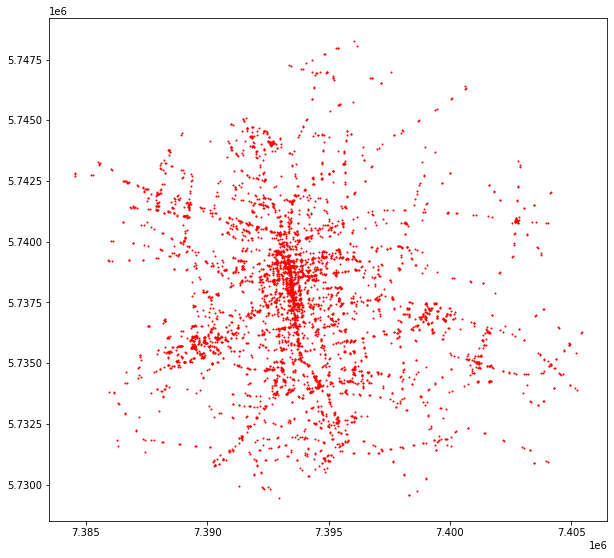

In [ ]:
#plotting
%time ax = df_amen.plot(figsize=(10, 10),color='red', markersize =1)

# 4. Import and create pedestrian network based on OSM

Download pedestrian network from OSM using graph_from_place:

In [ ]:
%time G_walk = ox.graph_from_place(places, network_type="walk")

C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Wall time: 1min 36s


Impute missing edge speeds and calculate edge travel times with the speed module:

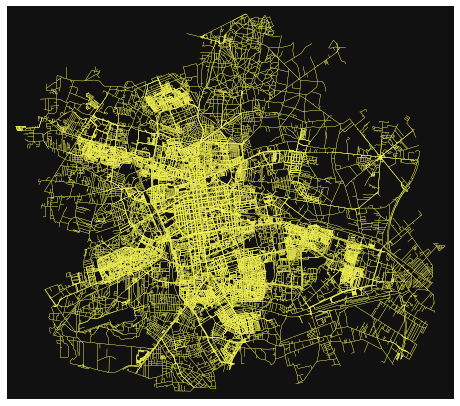

Wall time: 43.5 s


In [ ]:
%time fig, ax = ox.plot_graph(G_walk, node_size=0, edge_color="#FFFF5C", edge_linewidth=0.25)

In [ ]:
G_walk = ox.speed.add_edge_speeds(G_walk)
G_walk = ox.speed.add_edge_travel_times(G_walk)

C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Save graph for(uncomment to save):

In [ ]:
filepath_pednet

'A:/Architektura prace/IAAC 2.S.1 Studio/New_datasets/save_lodz/lodz_pednet.gpkg'

In [ ]:
ox.save_graph_geopackage(G_walk, filepath_pednet)

Read the Pedestrian Network line shape file and reproject to the used EPSG (uncomment to use saved file)

In [ ]:
# # reading pednet file
pednet = gpd.read_file(filepath_pednet, layer='edges')

C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\geopandas\geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [ ]:
type(pednet)

geopandas.geodataframe.GeoDataFrame

#### Continue with fresh data(uncomment ot use fresh data)

In [ ]:
# pednet = ox.utils_graph.graph_to_gdfs(G_walk)[1]

In [ ]:
# pednet = pednet.reset_index(level=[0,1]) #deal with multiindex column names
# pednet.head(2)

In [ ]:
pednet.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# reprojecting epsg 4386 (wgs84) to epsg specified above
# pednet = gpd.GeoDataFrame(pednet, crs="epsg:4326", geometry='geometry')
pednet = pednet.to_crs(crs)
pednet.crs

<Projected CRS: EPSG:2178>
Name: ETRS89 / Poland CS2000 zone 7
Axis Info [cartesian]:
- x[north]: Northing (metre)
- y[east]: Easting (metre)
Area of Use:
- name: Poland - 19.5°E to 22.5°E
- bounds: (19.5, 49.09, 22.5, 54.55)
Coordinate Operation:
- name: Poland CS2000 zone 7
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
### remove length column to avoid confusion
## pednet = pednet[['OBJECTID', 'road_type', 'sdwlk_code', 'sdwlk_desc', 'crosswalk', 'cwalk_type', 'px', 'px_type','geometry']]
## pednet.drop(columns=['junction','bridge','service','width','access','tunnel','area','from','to'],inplace=True)
pednet.drop(columns=['bridge','service','width','access','tunnel','from','to'],inplace=True)
# pednet.dropna(subset=['geometry'],inplace=True)
pednet.head(2)

,u,v,key,osmid,oneway,lanes,name,highway,maxspeed,length,speed_kph,travel_time,ref,junction,landuse,geometry
0,29780734,1831374515,0,4685153,False,3,Aleja Marszałka Józefa Piłsudskiego,secondary,50,36.444,50.0,2.6,,,,"LINESTRING (7395360.150 5737458.542, 7395366.0..."
1,29780734,5351247482,0,23423716,False,5,Doktora Stefana Kopcińskiego,primary,50,11.821,50.0,0.9,14,,,"LINESTRING (7395400.463 5737451.661, 7395398.7..."


#### Create a plot of the city wide Pedestrian Network

C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Wall time: 4.67 s


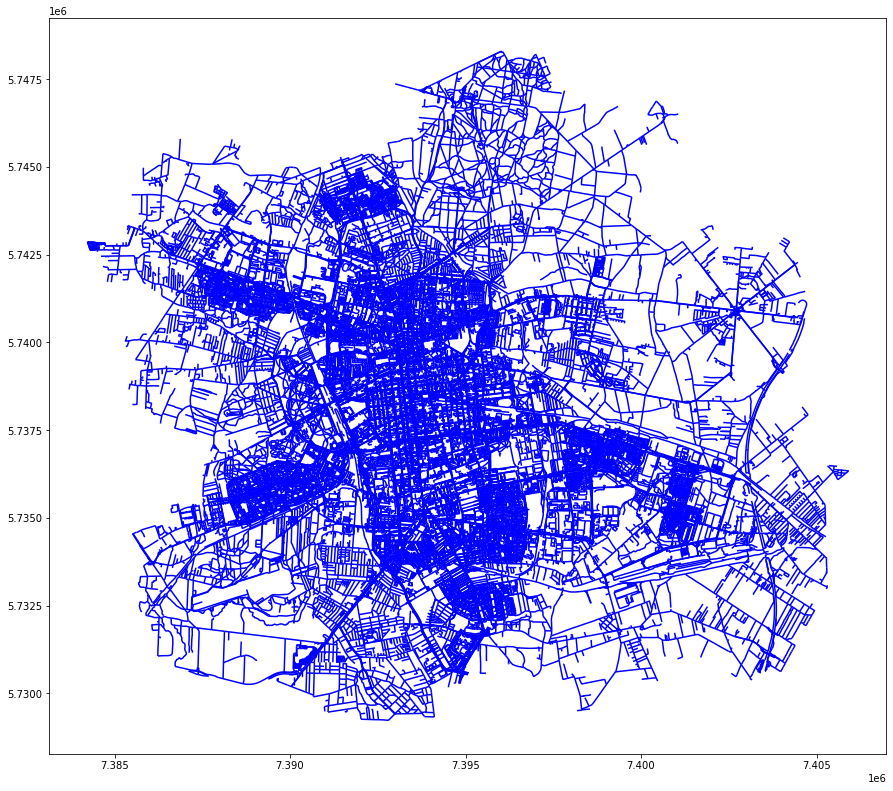

In [ ]:
# plotting pednet layer
%time ax = pednet.plot(figsize=(15, 15),color='blue', markersize =1)

#### Create a plot showing the Pedestrian Network at the city block level

In the plot below we see the cases where sidewalks are on both sides of the streets. Single lines represent several different features including local roads, walkways, laneways or private roads.   

In [ ]:
# # plotting pednet layer with limits set
# ax = pednet.plot(figsize=(12, 12),color='blue', markersize =1)
# # ax.set(xlim=(144.8372, 145.0631), ylim=(-37.7414, -37.8627)) #degree value
# ax.set(xlim=(18000, 18500), ylim=(32500, 33000)) #crs values

C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 5. Import address points from OSM

In [ ]:
tags = {
#     "building": True,
    "addr:housenumber": True,
}

%time G_buildings = ox.geometries.geometries_from_place(places, tags=tags)

Wall time: 48.3 s


In [ ]:
G_buildings = G_buildings.loc[['node']]
print('shape before dropna: '+str(G_buildings.shape))
G_buildings.dropna(subset=['geometry'],inplace=True)
G_buildings = G_buildings.loc[['node'],['geometry','name','amenity']]
print('shape after dropna: '+str(G_buildings.shape))
G_buildings.head(2)

shape before dropna: (26575, 341)


C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


shape after dropna: (26575, 3)


geometry                 name amenity
element_type osmid                                                           
node         30091069  POINT (19.46057 51.75898)       Multikino Łódź  cinema
             30091073  POINT (19.45880 51.75696)  Bankomat Millennium     atm

#### Save GDF to file(uncomment to use):

In [ ]:
print(filepath_address)

A:/Architektura prace/IAAC 2.S.1 Studio/New_datasets/save_lodz/lodz_address.geojson


C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
G_buildings.set_geometry(col='geometry', inplace=True)
G_buildings.to_file(filepath_address, driver="GeoJSON")

#### Load Address Data ####

Read the Address point shape file and reproject to EPSG chosen above(uncomment to load):

In [ ]:
address = gpd.read_file(filepath_address)

#### uncomment to use fresh data:

In [ ]:
# address = G_buildings.copy()

In [ ]:
address.head(2)

,element_type,osmid,name,amenity,geometry
0,node,30091069,Multikino Łódź,cinema,POINT (19.46057 51.75898)
1,node,30091073,Bankomat Millennium,atm,POINT (19.45880 51.75696)


In [ ]:
address.crs

C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
address.to_crs(crs, inplace=True)

address['x'] = address.geometry.x
address['y'] = address.geometry.y

address.crs

<Projected CRS: EPSG:2178>
Name: ETRS89 / Poland CS2000 zone 7
Axis Info [cartesian]:
- x[north]: Northing (metre)
- y[east]: Easting (metre)
Area of Use:
- name: Poland - 19.5°E to 22.5°E
- bounds: (19.5, 49.09, 22.5, 54.55)
Coordinate Operation:
- name: Poland CS2000 zone 7
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
address.dropna(subset=['geometry'],inplace=True)

In [ ]:
address.head(3)

C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,element_type,osmid,name,amenity,geometry,x,y
0,node,30091069,Multikino Łódź,cinema,POINT (7393719.245 5737206.453),7.393719e+06,5.737206e+06
1,node,30091073,Bankomat Millennium,atm,POINT (7393592.643 5736983.644),7.393593e+06,5.736984e+06
2,node,30091075,None,atm,POINT (7393637.385 5736938.482),7.393637e+06,5.736938e+06


In [ ]:
address.length

C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
26570    0.0
26571    0.0
26572    0.0
26573    0.0
26574    0.0
Length: 26575, dtype: float64

#### Explore address point data

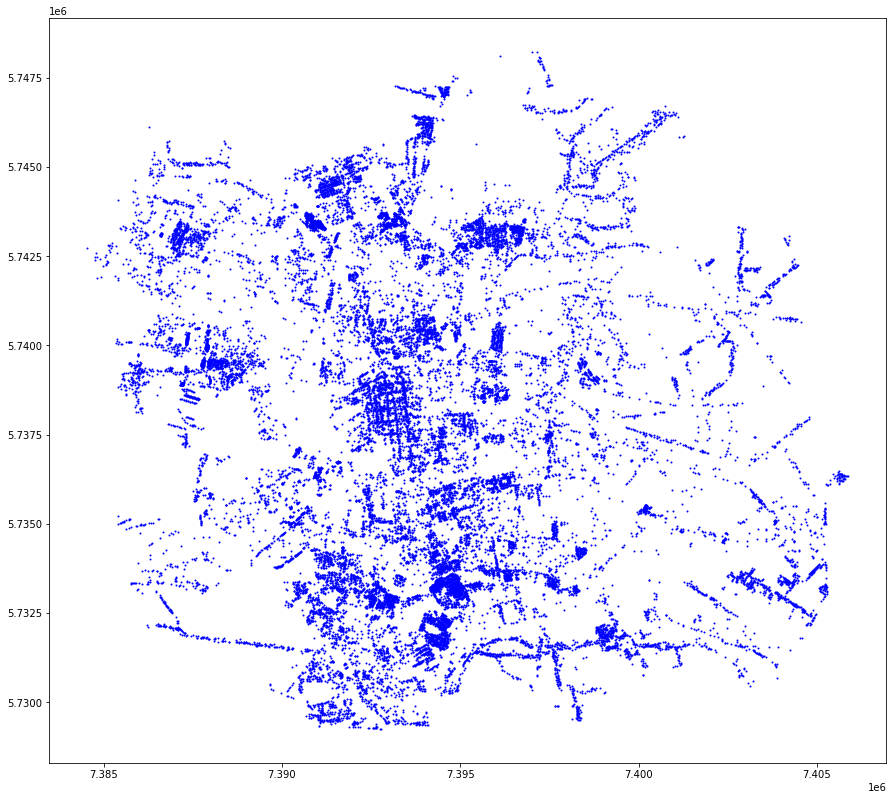

In [ ]:
ax = address.plot(figsize=(15, 15),color='blue', markersize =1)

#### Create a plot showing the address point data at the city block level

In [ ]:
# # plotting address layer with limits set
# ax = address.plot(figsize=(12, 12),color='blue', markersize =1)
# pednet.plot(ax=ax,color='black', markersize =1)
# ax.set(xlim=(18000, 18500), ylim=(32500, 33000)) #crs values

C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 6. Build Pandana Network #

Pandana is a Python package that uses contraction hierarchies to perform rapid network calculations including shortest paths and accessibility buffers. 

The link provides an introduction to the Pandana Network (https://udst.github.io/pandana/introduction.html).

#### Create Network Graph Code Function

In [ ]:
# creating network graph code
def create_graph(gdf, precision=3):
    '''Create a networkx given a GeoDataFrame of lines. Every line will
    correspond to two directional graph edges, one forward, one reverse. The
    original line row and direction will be stored in each edge. Every node
    will be where endpoints meet (determined by being very close together) and
    will store a clockwise ordering of incoming edges.
    '''
      
    G = nx.Graph()

    def make_node(coord, precision):
        return tuple(np.round(coord, precision))

    # Edges are stored as (from, to, data), where from and to are nodes.
    def add_edges(row, G):
        geometry = row.geometry
        coords = list(geometry.coords)
        geom_r = LineString(coords[::-1])
        coords_r = geom_r.coords
        start = make_node(coords[0], precision)
        end = make_node(coords[-1], precision)
        # Add forward edge
        fwd_attr ={}
        for k,v in row.items():
            fwd_attr[k]=v
        fwd_attr['forward']= 1
       #fwd_attr['geometry']=  geometry
        fwd_attr['length']=  geometry.length

        fwd_attr['visited']= 0

        G.add_edge(start, end, **fwd_attr)

    gdf.apply(add_edges, axis=1, args=[G])

    return G

#### Create a network graph from the function above ####

In [ ]:
pednet.head(5)

,u,v,key,osmid,oneway,lanes,name,highway,maxspeed,length,speed_kph,travel_time,ref,junction,landuse,geometry
0,29780734,1831374515,0,4685153,False,3,Aleja Marszałka Józefa Piłsudskiego,secondary,50,36.444,50.0,2.6,,,,"LINESTRING (7395360.150 5737458.542, 7395366.0..."
1,29780734,5351247482,0,23423716,False,5,Doktora Stefana Kopcińskiego,primary,50,11.821,50.0,0.9,14,,,"LINESTRING (7395400.463 5737451.661, 7395398.7..."
2,29780734,5351247499,0,164959931,False,4,Aleja Marszałka Józefa Piłsudskiego,primary,50,15.655,50.0,1.1,713,,,"LINESTRING (7395411.944 5737465.423, 7395406.6..."
3,29780734,1831374532,0,171941446,False,5,Doktora Stefana Kopcińskiego,primary,50,38.860,50.0,2.8,14,,,"LINESTRING (7395390.242 5737501.165, 7395391.6..."
4,29780739,5354224546,0,860657544,False,,Jana Kilińskiego,tertiary,50,15.080,50.0,1.1,,,,"LINESTRING (7394288.878 5737334.080, 7394284.7..."


In [ ]:
# creating network graph
%time G = create_graph(pednet)
#from G to urbanaccess network model - one node idx,x,y one edge from to weight
#G.edges(data=True)

C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Wall time: 14.1 s


In [ ]:
# get network "from" and "to" from nodes
edges = nx.to_pandas_edgelist(G,'from','to')
to = edges['to'].tolist()
fr = edges['from'].tolist()
fr = list(set(fr))
to = list(set(to))
to.extend(fr)
nodes = list(set(to))
nodes = pd.DataFrame(nodes)
nodes.columns=['x', 'y']
nodes['xy'] = nodes.apply(lambda z: (z.x,z.y),axis=1)


In [ ]:
# Assigning node ids to to_node and from_node

nodes['id'] = nodes.index
edges['to_node']=edges['to'].map(nodes.set_index('xy').id)
edges['from_node']=edges['from'].map(nodes.set_index('xy').id)
edges.head(3)


,from,to,key,maxspeed,landuse,geometry,speed_kph,travel_time,v,name,lanes,highway,oneway,junction,length,forward,u,ref,visited,osmid,to_node,from_node
0,"(7395360.15, 5737458.542)","(7395396.461, 5737462.796)",0,50,,LINESTRING (7395360.150078527 5737458.54219896...,50.0,2.6,1831374515,Aleja Marszałka Józefa Piłsudskiego,3,secondary,False,,36.559858,1,29780734,,0,4685153,3376,17529
1,"(7395360.15, 5737458.542)","(7395283.217, 5737449.613)",0,50,,LINESTRING (7395283.216650059 5737449.61339295...,50.0,5.6,1886496723,Aleja Marszałka Józefa Piłsudskiego,3,secondary,False,,77.458966,1,1831374515,,0,4685153,84754,17529
2,"(7395360.15, 5737458.542)","(7395360.845, 5737451.75)",0,,,LINESTRING (7395360.844554019 5737451.75000758...,29.3,0.8,2149587306,,,footway,False,,6.828504,1,1831374515,,0,"[392171424, 392171421]",57062,17529


#### Creating and Saving Pandana Network ####

Create the Pandana Network and save the file in case you lose the network in memory

In [ ]:
# creating pandana network

transit_ped_net = pdna.Network(nodes["x"],
                               nodes["y"],
                               edges["from_node"],
                               edges["to_node"],
                               pd.DataFrame([edges['length']]).T,
                               twoway=True)

# saving walkability file is optional. It can be used in the next steps if you don't have transit_ped_net in memory

# transit_ped_net.save_hdf5('./walkability_melbourne.hd5')


C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Reading Pandana Network file ####
This step is only required if you do not already have transit_ped_net in memory (loading saved file tends to crash .precompute function)

In [ ]:
# transit_ped_net = pdna.Network.from_hdf5('C:\Windows\System32\_local_studio\walkability_melbourne.hd5') #causes issues

C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Precompute a Horizon Distance
It’s probably a good idea to precompute a given horizon distance so
that aggregations don’t perform the network queries unnecessarily.
This is done by calling the following code, where 1000 meters is used as the horizon distance:

In [ ]:
#precompute a given horizon distance of 1000 meters
%time transit_ped_net.precompute(1000)
transit_ped_net.edges_df.head(2)

Wall time: 4.79 s


,from,to,length
0,17529,3376,36.559858
1,17529,84754,77.458966


#### Get the nearest pednet intersection node ids for each point from the amenities layers

Explore tags

In [ ]:
df_amen.pivot_table(index=['tag'], aggfunc='size')

C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


tag
base_shopping         887
bbq_area               20
bus_stops            1590
entertainment          30
food                  455
green_area             10
higher_education        9
hospital                4
nightlife             102
pharmacy              213
place_of_worship        9
primary_education      97
railway_stations      499
spec_healthcare       209
sport_facility         85
tourism               393
dtype: int64

In [ ]:
#get node_ids for points for each layer
x, y = df_amen.x, df_amen.y 
df_amen["node_ids"] = transit_ped_net.get_node_ids(x, y)

#moved to cell below:
# transit_ped_net.set(df_amen.loc[df_amen.loc[:,'tag']=='hospital','node_ids'], name="hospital")

# using x and y coordinates from address that are utm nad27 
x, y = address.x, address.y
address["node_ids"] = transit_ped_net.get_node_ids(x, y)

G_address = address.copy()
type(G_address)

geopandas.geodataframe.GeoDataFrame

In [ ]:
# df_amen.loc[df_amen.loc[:,'tag']=='hospital','node_ids']

C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_amen.head(2)

,osmid,name,tag,longitude,latitude,geometry,x,y,node_ids
0,29781398,Piotrkowska - pl. Niepodległości,railway_stations,19.462631,51.740899,POINT (7393819.224 5735191.778),7.393819e+06,5.735192e+06,105898
1,30091069,Multikino Łódź,entertainment,19.460569,51.758982,POINT (7393719.245 5737206.453),7.393719e+06,5.737206e+06,37621


# 7. Apply scoring to address points #

#### Function which evaluates scores based on walktime: ####

In [ ]:
def calc_score(val):
    if val <=30:
        return int(-2*val+100)
    elif val > 30 and val < 70:
        return int(-val + 70)
    else:
        return 0

calc_score = np.vectorize(calc_score)

calc_score(10)

C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(80)

#### Final definition, which encapsulates main features of the notebook ####
This function calculates n number of distances to the closest POI specified by tag_name and later adds specified columns to the dataframe:

In [ ]:
def calc_dist_cat(n, maxdistance, tag_name, keep=0, address=G_address, df_amen=df_amen, score=2):
    """
    :n: number of connections
    :maxdistance: maximum  distance to check for
    :tag_name: str of the tag to use
    :keep:  if  0 - keep nothing, if 1 - keep one, if 2 - keep all,
    :address: main data frame  of addresss  points
    :score: if  0 - no score if 1 - best score, if 2 - avg score
    function returns dataframe of shortest distances per address point
    """
    if (df_amen[df_amen.loc[:,'tag']==tag_name].shape)[0] == 0:
        print('The tag: ' + tag_name + ' is not in df_amen')
        return
    
    transit_ped_net.set(df_amen.loc[df_amen.loc[:,'tag']==tag_name,'node_ids'], name=tag_name)
    transit_ped_net.set_pois(tag_name, maxdistance , n,
                             df_amen.loc[df_amen.loc[:,'tag']==tag_name,'x'],
                             df_amen.loc[df_amen.loc[:,'tag']==tag_name,'y'])
    distances = transit_ped_net.nearest_pois(maxdistance , tag_name, num_pois=n, include_poi_ids=False)
    columns =  ['m'+tag_name+'_'+str(i) for i in range(0,n,1)]
    distances.columns = columns
    
    for i in range(n):
        address['m_'+tag_name+'_'+str(i)]=address['node_ids'].map(distances['m'+tag_name+'_'+str(i)])
        
    #prepare variables for statements:
    n_list = np.arange(n)
    col_first = 'm_'+tag_name+'_'+str(n_list[0])
    col_last= 'm_'+tag_name+'_'+str(n_list[-1])
    col_second = 'm_'+tag_name+'_'+str(n_list[1])
    
    address.loc[:, col_first:col_last] = (address.loc[:,col_first:col_last].values/(1.2*60)).astype(int)
    
    if score==1 or score==2:
        c_add = address.loc[:,col_first:col_last] #temp  copy just the columns with values
       
        #calc score:
        c_add.loc[:, col_first:col_last] = calc_score(c_add.loc[:,col_first:col_last].values)
        if score == 1:
            address[tag_name+'_'+'closest_score'] = c_add[col_first]
        elif score == 2:
            address[tag_name+'_'+'avg_score'+'_of_'+str(n)] = c_add.loc[:,col_first:col_last].mean(axis=1).astype(int)

    if keep == 0 and n==1:
        address.drop(columns=[col_first], inplace = True, axis = 1)
    elif keep == 0 and n>1:
        address.drop(address.loc[:, col_first:col_last], inplace = True, axis = 1)
    elif keep == 1 and n>1:
        address.drop(address.loc[:, col_second:col_last], inplace = True, axis = 1)

        
                
    
    return

In [ ]:
# (df_amen[df_amen.loc[:,'tag']=="s"].shape)[0] #way to check if tag is in the dataset

#### Check the number of each tags in df_amen ####

In [ ]:
df_amen.pivot_table(index=['tag'], aggfunc='size')

tag
base_shopping         887
bbq_area               20
bus_stops            1590
entertainment          30
food                  455
green_area             10
higher_education        9
hospital                4
nightlife             102
pharmacy              213
place_of_worship        9
primary_education      97
railway_stations      499
spec_healthcare       209
sport_facility         85
tourism               393
dtype: int64

#### Run the function to calculate scoring for different tag_names ####

In [ ]:
#get nearest points with id
n = 4
p = 8
maxdistance = 5000

# best score
# avg score

# %time calc_dist_cat(2,maxdistance, "public_transport") # avg score of 2
%time calc_dist_cat(2,maxdistance, "bus_stops")
%time calc_dist_cat(2,maxdistance, "railway_stations")

%time calc_dist_cat(n,maxdistance, "primary_education")
%time calc_dist_cat(n,maxdistance, "higher_education")

%time calc_dist_cat(2,maxdistance, "hospital") # best score of 2
%time calc_dist_cat(p,maxdistance, "spec_healthcare")
%time calc_dist_cat(2,maxdistance, "pharmacy")

%time calc_dist_cat(p,maxdistance, "food") #
%time calc_dist_cat(p,maxdistance, "nightlife")
%time calc_dist_cat(p,maxdistance, "entertainment")

%time calc_dist_cat(p,maxdistance, "sport_facility")
%time calc_dist_cat(2,maxdistance, "green_area")
%time calc_dist_cat(p,maxdistance, "bbq_area")
%time calc_dist_cat(n,maxdistance, "place_of_worship")
%time calc_dist_cat(p,maxdistance, "tourism")


G_address.head(2)

C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\pandana\network.py:660: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxitems, type(pd.Series())):
C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\pandana\network.py:668: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxdist, type(pd.Series())):


Wall time: 1.77 s


C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\pandana\network.py:660: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxitems, type(pd.Series())):
C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\pandana\network.py:668: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxdist, type(pd.Series())):


Wall time: 1.12 s


C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\pandana\network.py:660: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxitems, type(pd.Series())):
C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\pandana\network.py:668: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxdist, type(pd.Series())):


Wall time: 1.71 s


C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\pandana\network.py:660: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxitems, type(pd.Series())):
C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\pandana\network.py:668: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxdist, type(pd.Series())):


Wall time: 1.02 s


C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\pandana\network.py:660: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxitems, type(pd.Series())):
C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\pandana\network.py:668: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxdist, type(pd.Series())):


Wall time: 944 ms


C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\pandana\network.py:660: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxitems, type(pd.Series())):
C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\pandana\network.py:668: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxdist, type(pd.Series())):


Wall time: 2 s


C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\pandana\network.py:660: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxitems, type(pd.Series())):
C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\pandana\network.py:668: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxdist, type(pd.Series())):


Wall time: 1.09 s


C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\pandana\network.py:660: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxitems, type(pd.Series())):
C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\pandana\network.py:668: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxdist, type(pd.Series())):


Wall time: 2.17 s


C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\pandana\network.py:660: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxitems, type(pd.Series())):
C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\pandana\network.py:668: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxdist, type(pd.Series())):


Wall time: 1.45 s


C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\pandana\network.py:660: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxitems, type(pd.Series())):
C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\pandana\network.py:668: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxdist, type(pd.Series())):


Wall time: 1.84 s


C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\pandana\network.py:660: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxitems, type(pd.Series())):
C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\pandana\network.py:668: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxdist, type(pd.Series())):


Wall time: 1.37 s


C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\pandana\network.py:660: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxitems, type(pd.Series())):
C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\pandana\network.py:668: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxdist, type(pd.Series())):


Wall time: 810 ms


C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\pandana\network.py:660: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxitems, type(pd.Series())):
C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\pandana\network.py:668: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxdist, type(pd.Series())):


Wall time: 1.87 s


C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\pandana\network.py:660: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxitems, type(pd.Series())):
C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\pandana\network.py:668: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxdist, type(pd.Series())):


Wall time: 1.01 s


C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\pandana\network.py:660: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxitems, type(pd.Series())):
C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\pandana\network.py:668: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxdist, type(pd.Series())):


Wall time: 2.08 s


,element_type,osmid,name,amenity,geometry,x,y,node_ids,bus_stops_avg_score_of_2,railway_stations_avg_score_of_2,primary_education_avg_score_of_4,higher_education_avg_score_of_4,hospital_avg_score_of_2,spec_healthcare_avg_score_of_8,pharmacy_avg_score_of_2,food_avg_score_of_8,nightlife_avg_score_of_8,entertainment_avg_score_of_8,sport_facility_avg_score_of_8,green_area_avg_score_of_2,bbq_area_avg_score_of_8,place_of_worship_avg_score_of_4,tourism_avg_score_of_8
0,node,30091069,Multikino Łódź,cinema,POINT (7393719.245 5737206.453),7.393719e+06,5.737206e+06,37621,93,96,88,54,24,85,94,95,88,79,71,15,14,59,94
1,node,30091073,Bankomat Millennium,atm,POINT (7393592.643 5736983.644),7.393593e+06,5.736984e+06,111713,97,97,84,63,29,85,95,95,85,75,72,14,14,54,96


#### Clean and reorganized address dataframe ####

In [ ]:
# G_save = G_address.drop(columns=['block id','street address','number of floors (above ground)','latitude','longitude','x','y','node_ids'],axis=1)
G_save = G_address.drop(columns=['element_type','osmid','amenity','x','y','node_ids'],axis=1)

#reorder columns so geometry is first
cols = G_save.columns.tolist()
col_0_val=cols[0]
cols[0]=cols[1]
cols[1]=col_0_val

G_save = G_save[[*cols]]
G_save.head(1)

,geometry,name,bus_stops_avg_score_of_2,railway_stations_avg_score_of_2,primary_education_avg_score_of_4,higher_education_avg_score_of_4,hospital_avg_score_of_2,spec_healthcare_avg_score_of_8,pharmacy_avg_score_of_2,food_avg_score_of_8,nightlife_avg_score_of_8,entertainment_avg_score_of_8,sport_facility_avg_score_of_8,green_area_avg_score_of_2,bbq_area_avg_score_of_8,place_of_worship_avg_score_of_4,tourism_avg_score_of_8
0,POINT (7393719.245 5737206.453),Multikino Łódź,93,96,88,54,24,85,94,95,88,79,71,15,14,59,94


In [ ]:
cols

C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['geometry',
 'name',
 'bus_stops_avg_score_of_2',
 'railway_stations_avg_score_of_2',
 'primary_education_avg_score_of_4',
 'higher_education_avg_score_of_4',
 'hospital_avg_score_of_2',
 'spec_healthcare_avg_score_of_8',
 'pharmacy_avg_score_of_2',
 'food_avg_score_of_8',
 'nightlife_avg_score_of_8',
 'entertainment_avg_score_of_8',
 'sport_facility_avg_score_of_8',
 'green_area_avg_score_of_2',
 'bbq_area_avg_score_of_8',
 'place_of_worship_avg_score_of_4',
 'tourism_avg_score_of_8']

#### Reproject the crs back to degrees ####

In [ ]:
# G_save.to_crs(epsg=4326,allow_override=True)
G_save.to_crs(crs=4326,inplace=True)
# G_save.loc['geometry'] = G_save['geometry'].to_crs(crs=4326,inplace=True)
G_save.head(5)

,geometry,name,bus_stops_avg_score_of_2,railway_stations_avg_score_of_2,primary_education_avg_score_of_4,higher_education_avg_score_of_4,hospital_avg_score_of_2,spec_healthcare_avg_score_of_8,pharmacy_avg_score_of_2,food_avg_score_of_8,nightlife_avg_score_of_8,entertainment_avg_score_of_8,sport_facility_avg_score_of_8,green_area_avg_score_of_2,bbq_area_avg_score_of_8,place_of_worship_avg_score_of_4,tourism_avg_score_of_8
0,POINT (19.46057 51.75898),Multikino Łódź,93,96,88,54,24,85,94,95,88,79,71,15,14,59,94
1,POINT (19.45880 51.75696),Bankomat Millennium,97,97,84,63,29,85,95,95,85,75,72,14,14,54,96
2,POINT (19.45947 51.75656),None,98,98,83,64,29,85,94,96,85,74,71,14,14,53,97
3,POINT (19.46676 51.78567),None,98,98,84,54,33,75,93,76,62,45,55,1,11,52,81
4,POINT (19.42277 51.79255),Lotos,95,93,52,13,20,61,80,75,35,33,46,10,9,26,58


In [ ]:
G_save.crs

C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
G_save.shape

(26575, 17)

#### Save GeoJSON file ####

In [ ]:
# G_address.to_file("whole_melbourne_address_scores.geojson", driver='GeoJSON')
G_save.to_file(filepath_tag_geojson, driver='GeoJSON')

#### Save CSV file ####

In [ ]:
# G_address.to_csv("whole_melbourne_address_scores.csv",index=False,mode='w')
G_save.to_csv(filepath_tag_csv,index=False,mode='w')

# Extra

In [ ]:
df_ = gpd.read_file(r"C:\Users\solty\melbourne_address_min_scores.geojson")
df_.head(2)

,block id,street address,number of floors (above ground),predominant space use,latitude,longitude,x,y,node_ids,m_bus_stop_0,bus_stop_closest_score,bus_stop_avg_score_of_5,m_primary_education_0,primary_education_closest_score,primary_education_avg_score_of_5,m_higher_education_0,higher_education_closest_score,higher_education_avg_score_of_5,m_hospital_0,hospital_closest_score,hospital_avg_score_of_5,m_spec_healthcare_0,spec_healthcare_closest_score,spec_healthcare_avg_score_of_5,m_pharmacy_0,pharmacy_closest_score,pharmacy_avg_score_of_5,m_food_0,food_closest_score,food_avg_score_of_5,m_nightlife_0,nightlife_closest_score,nightlife_avg_score_of_5,m_entertainment_0,entertainment_closest_score,entertainment_avg_score_of_5,m_sport_facility_0,sport_facility_closest_score,sport_facility_avg_score_of_5,m_green_area_0,green_area_closest_score,green_area_avg_score_of_5,m_bbq_area_0,bbq_area_closest_score,bbq_area_avg_score_of_5,m_place_of_worship_0,place_of_worship_closest_score,place_of_worship_avg_score_of_5,m_tourism_0,tourism_closest_score,tourism_avg_score_of_5,geometry
0,237,14 Barrup Street CARLTON 3053,2,House/Townhouse,144.9739,-37.8002,321622.956180,5.814419e+06,8393,4.8,90,87.8,7.7,84,62.4,6.9,86,73.6,26.4,47,32.4,1.2,97,89.0,6.8,86,80.6,2.5,95,90.6,4.0,92,89.4,8.8,82,80.0,6.4,87,71.2,16.9,66,15.8,7.8,84,72.2,8.4,83,77.2,6.8,86,82.8,POINT (321622.956 5814419.318)
1,569,64-66 Howlett Street KENSINGTON 3031,2,House/Townhouse,144.9212,-37.7906,316959.067331,5.815383e+06,59301,9.4,81,72.2,23.6,52,40.2,41.5,28,9.6,56.9,13,7.0,18.8,62,59.8,18.3,63,49.8,3.7,92,70.2,13.9,72,60.0,18.8,62,42.6,15.2,69,49.8,55.7,14,3.2,13.5,73,67.6,18.7,62,54.6,19.6,60,57.6,POINT (316959.067 5815382.675)


In [ ]:
df = df_.copy()

In [ ]:
df.crs

<Projected CRS: EPSG:32755>
Name: WGS 84 / UTM zone 55S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - S hemisphere - 144°E to 150°E - by country
- bounds: (144.0, -80.0, 150.0, 0.0)
Coordinate Operation:
- name: UTM zone 55S
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# df.to_crs('4326')
df.head(2)

,block id,street address,number of floors (above ground),predominant space use,latitude,longitude,x,y,node_ids,m_bus_stop_0,bus_stop_closest_score,bus_stop_avg_score_of_5,m_primary_education_0,primary_education_closest_score,primary_education_avg_score_of_5,m_higher_education_0,higher_education_closest_score,higher_education_avg_score_of_5,m_hospital_0,hospital_closest_score,hospital_avg_score_of_5,m_spec_healthcare_0,spec_healthcare_closest_score,spec_healthcare_avg_score_of_5,m_pharmacy_0,pharmacy_closest_score,pharmacy_avg_score_of_5,m_food_0,food_closest_score,food_avg_score_of_5,m_nightlife_0,nightlife_closest_score,nightlife_avg_score_of_5,m_entertainment_0,entertainment_closest_score,entertainment_avg_score_of_5,m_sport_facility_0,sport_facility_closest_score,sport_facility_avg_score_of_5,m_green_area_0,green_area_closest_score,green_area_avg_score_of_5,m_bbq_area_0,bbq_area_closest_score,bbq_area_avg_score_of_5,m_place_of_worship_0,place_of_worship_closest_score,place_of_worship_avg_score_of_5,m_tourism_0,tourism_closest_score,tourism_avg_score_of_5,geometry
0,237,14 Barrup Street CARLTON 3053,2,House/Townhouse,144.9739,-37.8002,321622.956180,5.814419e+06,8393,4.8,90,87.8,7.7,84,62.4,6.9,86,73.6,26.4,47,32.4,1.2,97,89.0,6.8,86,80.6,2.5,95,90.6,4.0,92,89.4,8.8,82,80.0,6.4,87,71.2,16.9,66,15.8,7.8,84,72.2,8.4,83,77.2,6.8,86,82.8,POINT (321622.956 5814419.318)
1,569,64-66 Howlett Street KENSINGTON 3031,2,House/Townhouse,144.9212,-37.7906,316959.067331,5.815383e+06,59301,9.4,81,72.2,23.6,52,40.2,41.5,28,9.6,56.9,13,7.0,18.8,62,59.8,18.3,63,49.8,3.7,92,70.2,13.9,72,60.0,18.8,62,42.6,15.2,69,49.8,55.7,14,3.2,13.5,73,67.6,18.7,62,54.6,19.6,60,57.6,POINT (316959.067 5815382.675)


In [ ]:
df.drop(columns=['x','y','node_ids', 'geometry'], axis=1, inplace=True)
df.head(2)

,block id,street address,number of floors (above ground),predominant space use,latitude,longitude,m_bus_stop_0,bus_stop_closest_score,bus_stop_avg_score_of_5,m_primary_education_0,primary_education_closest_score,primary_education_avg_score_of_5,m_higher_education_0,higher_education_closest_score,higher_education_avg_score_of_5,m_hospital_0,hospital_closest_score,hospital_avg_score_of_5,m_spec_healthcare_0,spec_healthcare_closest_score,spec_healthcare_avg_score_of_5,m_pharmacy_0,pharmacy_closest_score,pharmacy_avg_score_of_5,m_food_0,food_closest_score,food_avg_score_of_5,m_nightlife_0,nightlife_closest_score,nightlife_avg_score_of_5,m_entertainment_0,entertainment_closest_score,entertainment_avg_score_of_5,m_sport_facility_0,sport_facility_closest_score,sport_facility_avg_score_of_5,m_green_area_0,green_area_closest_score,green_area_avg_score_of_5,m_bbq_area_0,bbq_area_closest_score,bbq_area_avg_score_of_5,m_place_of_worship_0,place_of_worship_closest_score,place_of_worship_avg_score_of_5,m_tourism_0,tourism_closest_score,tourism_avg_score_of_5
0,237,14 Barrup Street CARLTON 3053,2,House/Townhouse,144.9739,-37.8002,4.8,90,87.8,7.7,84,62.4,6.9,86,73.6,26.4,47,32.4,1.2,97,89.0,6.8,86,80.6,2.5,95,90.6,4.0,92,89.4,8.8,82,80.0,6.4,87,71.2,16.9,66,15.8,7.8,84,72.2,8.4,83,77.2,6.8,86,82.8
1,569,64-66 Howlett Street KENSINGTON 3031,2,House/Townhouse,144.9212,-37.7906,9.4,81,72.2,23.6,52,40.2,41.5,28,9.6,56.9,13,7.0,18.8,62,59.8,18.3,63,49.8,3.7,92,70.2,13.9,72,60.0,18.8,62,42.6,15.2,69,49.8,55.7,14,3.2,13.5,73,67.6,18.7,62,54.6,19.6,60,57.6


In [ ]:
df.to_csv("melbourne_address_min_scores_clean.csv",index=False,mode='w')

In [ ]:
type(G_address)

geopandas.geodataframe.GeoDataFrame

In [ ]:
G_address.loc[:,'d_bus_stop_0':'d_bus_stop_4'] = np.around(G_address.loc[:,'d_bus_stop_0':'d_bus_stop_4'].values/(1.2*60), 1)

G_address.loc[:,'d_bus_stop_0':'d_bus_stop_4'] = calc_score(G_address.loc[:,'d_bus_stop_0':'d_bus_stop_4'].values)
G_address['closest_score'] = G_address['d_bus_stop_0']
G_address['avg_score'] = G_address.loc[:,'d_bus_stop_0':'d_bus_stop_4'].mean(axis=1)
G_address.head(2)

,block id,street address,number of floors (above ground),predominant space use,latitude,longitude,geometry,x,y,node_ids,d_bus_stop_0,d_bus_stop_1,d_bus_stop_2,d_bus_stop_3,d_bus_stop_4,closest_score,avg_score
0,237,14 Barrup Street CARLTON 3053,2,House/Townhouse,144.9739,-37.8002,POINT (321622.956 5814419.318),321622.956180,5.814419e+06,8393,90,89,88,86,86,90,87.8
1,569,64-66 Howlett Street KENSINGTON 3031,2,House/Townhouse,144.9212,-37.7906,POINT (316959.067 5815382.675),316959.067331,5.815383e+06,59301,81,73,72,68,67,81,72.2


## Visualize the scoring ##

In [ ]:
G_save = gpd.read_file(filepath_tag_geojson)
G_amen = gpd.read_file(filepath_tag_geojson)
pednet = gpd.read_file(filepath_pednet)
print(G_save.crs)
G_save.head(2)

C:\ProgramData\Anaconda3\envs\ox_ox\lib\site-packages\geopandas\geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


epsg:4326


,name,bus_stops_avg_score_of_2,railway_stations_avg_score_of_2,primary_education_avg_score_of_4,higher_education_avg_score_of_4,hospital_avg_score_of_2,spec_healthcare_avg_score_of_8,pharmacy_avg_score_of_2,food_avg_score_of_8,nightlife_avg_score_of_8,entertainment_avg_score_of_8,sport_facility_avg_score_of_8,green_area_avg_score_of_2,bbq_area_avg_score_of_8,place_of_worship_avg_score_of_4,tourism_avg_score_of_8,geometry
0,Multikino Łódź,93,96,88,54,24,85,94,95,88,79,71,15,14,59,94,POINT (19.46057 51.75898)
1,Bankomat Millennium,97,97,84,63,29,85,95,95,85,75,72,14,14,54,96,POINT (19.45880 51.75696)


Text(0.5, 1.0, 'Score of the tag:bus_stops_avg_score_of_2')

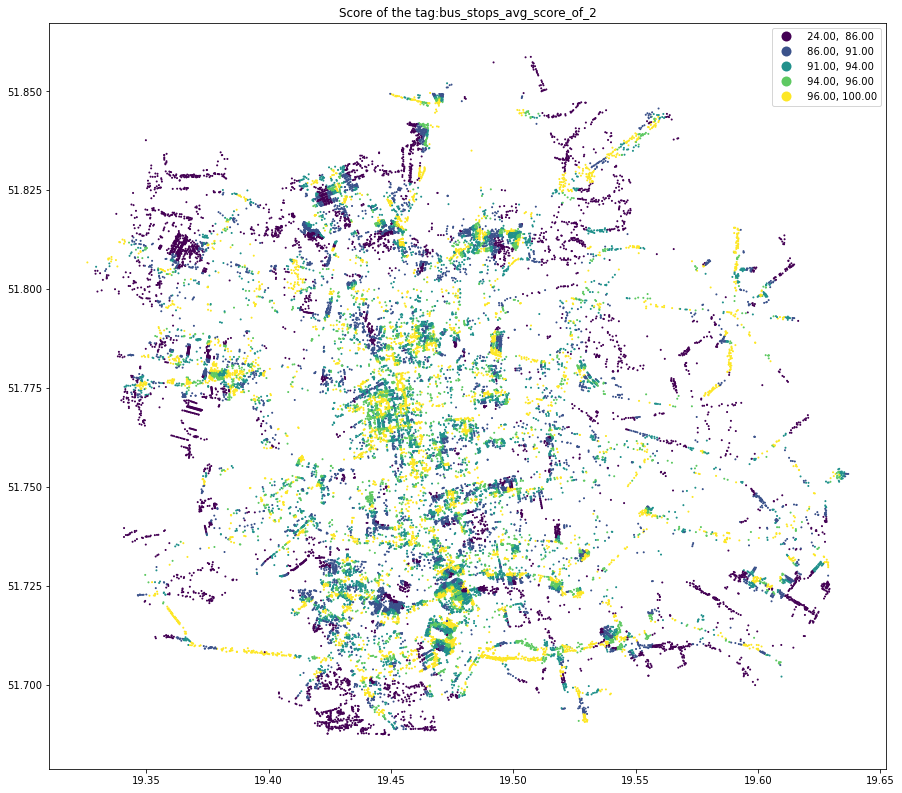

In [ ]:
visualize_tag = 'bus_stops_avg_score_of_2'

ax = G_save.plot(figsize=(15, 15), column=visualize_tag, scheme='quantiles', legend=True,markersize = 1)
# G_save.plot(ax=ax, color='red', markersize =1) # visualize POIs
# pednet.plot(ax=ax,color='gray', markersize = 0.01) #visualize street network
plt.title('Score of the tag:'+visualize_tag)
# ax.set(xlim=(314610, 323345), ylim=(5.810*1e6, 5.817*1e6)) #zoom map


## Calculate average score per cluster

In [ ]:
# df_cat['cluster_score']=np.nan

# cluster = 7

# cluster_sum =[]

# for i in range(cluster):
    
#     df_temp = df_cat.loc[df_cat.loc[:,'cluster_values']==i] #grab the clusters of value i
#     df_temp = df_temp.loc[:,'m_bus_stop_0':'tourism_avg_score_of_5'].values #convert temp df to numpy array

#     num_of_rows = len(df_cat.loc[df_cat.loc[:,'cluster_values']==i])
#     sum_of_scores = np.sum(df_temp) #sum all scores

#     score_cluster = round(sum_of_scores/num_of_rows, 0) #get average score per cluster
    
#     df_cat.loc[df_cat.loc[:,'cluster_values']==i, 'cluster_score'] = score_cluster


# df_cat

,Unnamed: 0,block id,street address,number of floors (above ground),predominant space use,latitude,longitude,geometry,x,y,node_ids,m_bus_stop_0,bus_stop_closest_score,bus_stop_avg_score_of_5,m_primary_education_0,primary_education_closest_score,primary_education_avg_score_of_5,m_higher_education_0,higher_education_closest_score,higher_education_avg_score_of_5,m_hospital_0,hospital_closest_score,hospital_avg_score_of_5,m_spec_healthcare_0,spec_healthcare_closest_score,spec_healthcare_avg_score_of_5,m_pharmacy_0,pharmacy_closest_score,pharmacy_avg_score_of_5,m_food_0,food_closest_score,food_avg_score_of_5,m_nightlife_0,nightlife_closest_score,nightlife_avg_score_of_5,m_entertainment_0,entertainment_closest_score,entertainment_avg_score_of_5,m_sport_facility_0,sport_facility_closest_score,sport_facility_avg_score_of_5,m_green_area_0,green_area_closest_score,green_area_avg_score_of_5,m_bbq_area_0,bbq_area_closest_score,bbq_area_avg_score_of_5,m_place_of_worship_0,place_of_worship_closest_score,place_of_worship_avg_score_of_5,m_tourism_0,tourism_closest_score,tourism_avg_score_of_5,cluster_values,cluster_score
0,0,237,14 Barrup Street CARLTON 3053,2.0,House/Townhouse,144.9739,-37.8002,POINT (321622.9561798354 5814419.318015557),321622.956180,5.814419e+06,8393,4.8,90,87.8,7.7,84,62.4,6.9,86,73.6,26.4,47,32.4,1.2,97,89.0,6.8,86,80.6,2.5,95,90.6,4.0,92,89.4,8.8,82,80.0,6.4,87,71.2,16.9,66,15.8,7.8,84,72.2,8.4,83,77.2,6.8,86,82.8,0,2214.0
1,1,569,64-66 Howlett Street KENSINGTON 3031,2.0,House/Townhouse,144.9212,-37.7906,POINT (316959.0673309102 5815382.674538471),316959.067331,5.815383e+06,59301,9.4,81,72.2,23.6,52,40.2,41.5,28,9.6,56.9,13,7.0,18.8,62,59.8,18.3,63,49.8,3.7,92,70.2,13.9,72,60.0,18.8,62,42.6,15.2,69,49.8,55.7,14,3.2,13.5,73,67.6,18.7,62,54.6,19.6,60,57.6,4,1852.0
2,2,345,62 Curzon Street NORTH MELBOURNE 3051,2.0,Office,144.9483,-37.8031,POINT (319375.9680464366 5814048.332618605),319375.968046,5.814048e+06,12486,6.2,87,84.4,17.5,65,46.2,1.7,96,61.6,13.1,73,44.2,1.2,97,96.2,9.6,80,69.4,1.4,97,95.2,2.2,95,86.8,2.2,95,83.6,21.3,57,49.0,23.8,52,17.4,11.1,77,70.8,7.2,85,68.0,7.4,85,80.4,6,2104.0
3,3,356,93 Howard Street NORTH MELBOURNE 3051,1.0,Office,144.9535,-37.8048,POINT (319837.9374864404 5813869.730880668),319837.937486,5.813870e+06,10509,6.6,86,83.2,14.0,72,48.0,11.3,77,66.6,9.1,81,49.6,3.7,92,88.0,9.1,81,76.2,1.6,96,93.8,2.7,94,90.4,4.0,92,83.8,14.1,71,61.4,20.3,59,18.8,8.1,83,67.0,3.1,93,75.4,4.7,90,86.6,6,2104.0
4,4,853,9-11 Alexandra Avenue SOUTH YARRA 3141,2.0,House/Townhouse,144.9856,-37.8289,POINT (322721.8033771914 5811256.873322182),322721.803377,5.811257e+06,22574,1.3,97,85.6,30.1,39,26.0,25.4,49,37.8,29.1,41,19.6,24.5,51,43.0,11.5,77,61.2,5.0,90,79.2,12.9,74,66.6,15.0,70,50.0,35.9,34,32.8,21.9,56,14.0,4.0,92,90.0,16.1,67,52.4,5.5,89,76.0,2,1880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234986,234986,349,138 Curzon Street NORTH MELBOURNE 3051,1.0,House/Townhouse,144.9490,-37.7999,POINT (319428.575037597 5814405.059106372),319428.575038,5.814405e+06,2798,1.6,96,93.2,17.8,64,44.8,6.4,87,56.6,10.4,79,47.8,5.1,89,87.8,5.0,90,72.6,4.7,90,88.4,2.2,95,86.6,6.8,86,77.6,21.6,56,51.6,21.1,57,17.6,7.6,84,76.8,10.6,78,69.2,5.4,89,82.0,5,2162.0
234987,234987,32,522-534 Collins Street MELBOURNE 3000,39.0,Office,144.9568,-37.8177,POINT (320160.7928698733 5812444.258050469),320160.792870,5.812444e+06,30770,5.9,88,86.2,5.5,89,60.4,14.8,70,58.2,28.6,42,29.6,0.4,99,86.2,2.9,94,89.8,1.3,97,96.2,2.9,94,91.8,3.5,93,72.0,9.2,81,71.8,18.2,63,21.0,8.9,82,68.4,3.4,93,63.6,3.4,93,90.2,0,2214.0
234988,234988,18,1-9 Spring Street MELBOURNE 3000,29.0,Office,144.9738,-37.8150,POINT (321649.0309478189 5812777.549326446),321649.030948,5.812778e+06,36490,7.9,84,79.0,11.0,78,54.4,9.2,81,74.0,27.5,45,29.6,3.4,93,80.6,8.0,84,80.8,2.3,95,94.0,3.1,93,88.6,4.0,92,85.6